
# Drowsiness Detection: Quantitative Analysis

Authors: Gasser Elazab and Livia Waller



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

import sys
sys.path.insert(0,'/content/drive/MyDrive/DrowsinessDetection/source')

Mounted at /content/drive/


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import tools
import tests
import pandas as pd

In [ ]:
# When running on your own computer, you can specify the data directory by:
data_dir = tools.select_data_dir('/content/drive/MyDrive/DrowsinessDetection')
source_dir = '/content/drive/MyDrive/DrowsinessDetection/source'
print(data_dir)

The data directory is /content/drive/MyDrive/DrowsinessDetection
/content/drive/MyDrive/DrowsinessDetection


In [ ]:
# Select the device for training (use GPU if you have one)
device = torch.device('cuda:0')
#device = torch.device('cpu')

In [ ]:
data_dir_yawn = os.path.join(data_dir,'data/yawn_data')
data_dir_eyes = os.path.join(data_dir,'data/eyes_data')
data_dir_fatigue = os.path.join(data_dir,'data/fatigue_data')

##Independent/Dependent Variables and Expected Properties

Our data are three labelled image datasets intended to use for deep learning model. There are two variables in our data: Images and Labels. The data is of categorical nature that means that both variables are belonging to a category, in our case we call the categories classes. The goal of this quantitative analysis to explore the distribution of the frequency of the images among the categories and datasets. This will help us to find where bias could be introduced because of the distribution among the classes and datasets as well as because of the size of the datasets. 

Independent variables:  
* Images
* Datasets

Expected properties:    

*   Image data in color
*   Different image sizes
*   Evenly distributed among classes and datasets

Dependent variables:    
*   Labels
  

##Datasets



###Preprocessing
Preprocessing consists of:

1.   Resizing the images
2.   Turn it into grayscale colors
3.   Convert into a tensor
4.   Normalize the tensor values 



In [ ]:
data_transform = transforms.Compose([
        transforms.Resize((28,28)),     #Questionable?
        transforms.Grayscale(),               
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))  # Scale images to [-1, 1]
])

###Yawn Dataset

In [17]:
dataset_yawn = datasets.ImageFolder(data_dir_yawn, transform=data_transform)

size_yawn = len(dataset_yawn)
print(size_yawn)
trainset_yawn, testset_yawn = torch.utils.data.random_split(dataset_yawn, [len(dataset_yawn)-150, 150])

classes = ['yawn', 'no_yawn']

trainloader_yawn = torch.utils.data.DataLoader(trainset_yawn, batch_size=32, shuffle=True)
testloader_yawn = torch.utils.data.DataLoader(testset_yawn, batch_size=5, shuffle=False)

train_yawn = len(trainset_yawn)
test_yawn = len(testset_yawn)
print(train_yawn)
print(test_yawn)

1450
1300
150


###Eyes Dataset

In [ ]:
dataset_eyes = datasets.ImageFolder(data_dir_eyes, transform=data_transform)

size_eyes = len(dataset_eyes)
print(size_eyes)
trainset_eyes, testset_eyes = torch.utils.data.random_split(dataset_eyes, [len(dataset_eyes)-240, 240])

classes = ['closed_eyes', 'open_eyes']

trainloader_eyes = torch.utils.data.DataLoader(trainset_eyes, batch_size=32, shuffle=True)
testloader_eyes = torch.utils.data.DataLoader(testset_eyes, batch_size=5, shuffle=False)

train_eyes = len(trainset_eyes)
test_eyes = len(testset_eyes)
print(train_eyes)
print(test_eyes)

2423
2183
240


###Fatigue Dataset

In [ ]:
dataset_fatigue = datasets.ImageFolder(data_dir_fatigue, transform=data_transform)

size_fatigue = len(dataset_fatigue)
print(size_fatigue)
trainset_fatigue, testset_fatigue = torch.utils.data.random_split(dataset_fatigue, [len(dataset_fatigue)-390, 390])

classes = ['alert', 'non_vigilant', 'tired']

trainloader_fatigue = torch.utils.data.DataLoader(trainset_fatigue, batch_size=32, shuffle=True)
testloader_fatigue = torch.utils.data.DataLoader(testset_fatigue, batch_size=5, shuffle=False)

train_fatigue = len(trainset_fatigue)
test_fatigue = len(testset_fatigue)
print(train_fatigue)
print(test_fatigue)

3907
3517
390


###Visualizing the data

####Show Example Images of Yawn Dataset

torch.Size([1, 28, 28])


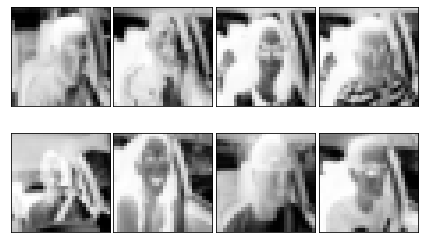

In [ ]:
#Plot a few images in greyscale
images, labels = iter(trainloader_yawn).next()
tests.plot_images(images[:8], n_rows=2)
print(images[0].shape)

####Show Example Images of Eyes Dataset

torch.Size([1, 28, 28])


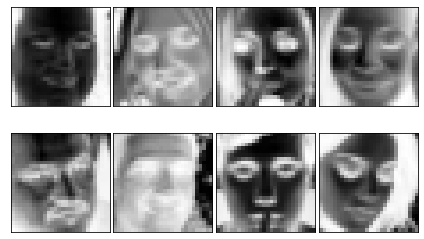

In [ ]:
#Plot a few images in greyscale
images, labels = iter(trainloader_eyes).next()
tests.plot_images(images[:8], n_rows=2)
print(images[0].shape)

####Show Example Images of Fatigue Dataset

torch.Size([1, 28, 28])


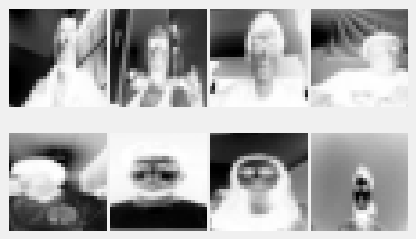

In [23]:
#Plot a few images in greyscale
images, labels = iter(trainloader_fatigue).next()
tests.plot_images(images[:8], n_rows=2)
print(images[0].shape)

###Comparison of Dataset Size to Find Size Bias

Text(0, 0.5, 'Datasets')

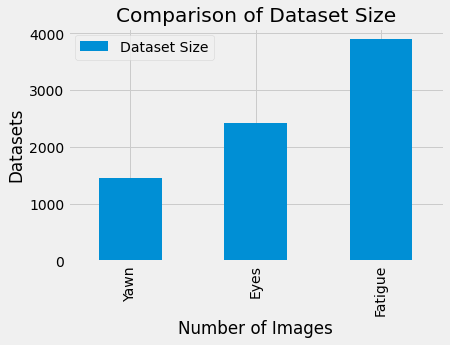

In [18]:
plotdata = pd.DataFrame(
    {"Dataset Size": [size_yawn, size_eyes, size_fatigue]}, 
    index=["Yawn", "Eyes", "Fatigue"])
plt.style.use('fivethirtyeight') 
plotdata.plot(kind="bar")
plt.title("Comparison of Dataset Size")
plt.xlabel("Number of Images")
plt.ylabel("Datasets")

In [19]:
plotdata = pd.DataFrame(
    {"Total": [size_yawn, size_eyes, size_fatigue],
     "Trainset":[train_yawn, train_eyes, train_fatigue],
     "Testset":[test_yawn, test_eyes, test_fatigue]
     }, 
    index=["Yawn", "Eyes", "Fatigue"]
)
plotdata.head()

,Total,Trainset,Testset
Yawn,1450,1300,150
Eyes,2423,2183,240
Fatigue,3907,3517,390


Text(0, 0.5, 'Number of Images')

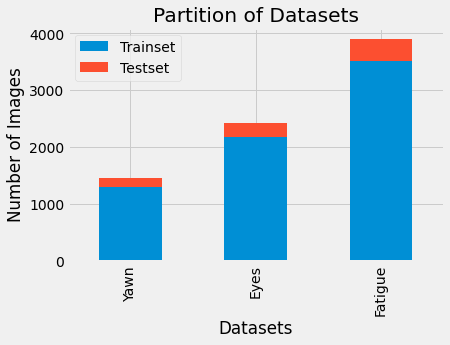

In [20]:
#plotdata.apply(lambda x: x*100/sum(x), axis=1)
stacked_data = pd.DataFrame(
    {
     "Trainset":[train_yawn, train_eyes, train_fatigue],
     "Testset":[test_yawn, test_eyes, test_fatigue]
     }, 
    index=["Yawn", "Eyes", "Fatigue"]
)
plt.style.use('fivethirtyeight') 
stacked_data.plot(kind="bar", stacked=True)
plt.title("Partition of Datasets")
plt.xlabel("Datasets")
plt.ylabel("Number of Images")

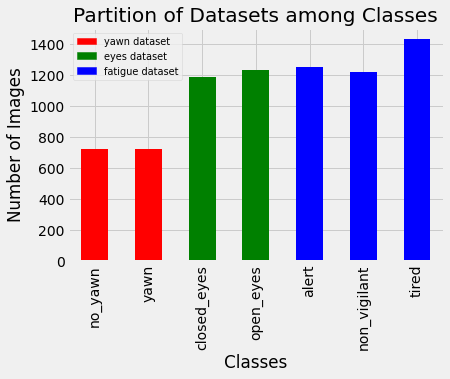

In [21]:
from collections import Counter
import matplotlib.patches as mpatches
counts_yawn = Counter(x[1] for x in dataset_yawn.imgs)
counts_eyes = Counter(x[1] for x in dataset_eyes.imgs)
counts_fatigue = Counter(x[1] for x in dataset_fatigue.imgs)

classes_data = pd.DataFrame(
    {
     "Class Size":[counts_yawn[0], counts_yawn[1], counts_eyes[0],counts_eyes[1],counts_fatigue[0],counts_fatigue[1],counts_fatigue[2]],
     }, 
    index=['no_yawn', 'yawn', 'closed_eyes', 'open_eyes', 'alert', 'non_vigilant','tired']
)
plt.style.use('fivethirtyeight') 
classes_data['Class Size'].plot(kind="bar", stacked=True, color=['red', 'red', 'green', 'green','blue', 'blue', 'blue'])
plt.title("Partition of Datasets among Classes")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
y = mpatches.Patch(color='red', label= 'yawn dataset')
e = mpatches.Patch(color='green', label= 'eyes dataset')
f = mpatches.Patch(color='blue', label= 'fatigue dataset')
plt.legend(handles = [y,e,f], fontsize = 'x-small')

## Does your data have the expected properties? If not, can you identify why it does not?

This analysis showed that the data is mostly evenly distributed among the dataset but among the all datasets. For our further work we have to consider this imbalance and be mindful about the bias that could be introduce. 


## Future Work
In order to gain understanding of the similarities in our image data, we will try to apply TSNE to our data.
Further we will apply deep learning model(s)/supervised learning to our data. The model will trained to make label predictions for the images. 
